In [1]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
prefix_dir = '/home/smgutstein/Projects/SG_Projects/opt-tfer/results/opt_tfer_expts/'
expt_dir = 'tinyimagenet200_notliving_living_expts/wide_resnet_28_10_arch/tfer_nets'
spc_dir = 'spc_10'
root_dir = os.path.join(prefix_dir, expt_dir, spc_dir)


In [2]:
data_dirs = sorted([os.path.join(root_dir, x) for x in os.listdir(root_dir) if x[-1]=='0' or x[-1]=='t'])

In [28]:
data_dict = defaultdict(list)
for curr_src in data_dirs:
    curr_key = os.path.basename(curr_src).split('_')[-1]
    print (curr_key)
    expt_dirs = os.listdir(curr_src)
    for curr_expt in expt_dirs:
        tr_dirs = os.listdir(os.path.join(curr_src, curr_expt))
        for curr_tr in tr_dirs:
            v_dirs = os.listdir(os.path.join( curr_src, curr_expt, curr_tr))[0]
            fpath = os.path.join(curr_src, curr_expt, curr_tr, v_dirs, 'metadata')
            with open(os.path.join(fpath,'Expt_output.log')) as f:
                fl = f.readlines()
                #print (fl[-1].split(":")[-1].split('%')[0].strip())
                try:
                    acc = float(fl[-1].split(":")[-1].split('%')[0].strip())
                    data_dict[curr_key].append(acc)
                except:
                    import pdb
                    pdb.set_trace()
                    data_dict[curr_src].append(acc)
 
    

0
10
100
110
120
130
140
150
160
170
180
190
20
200
30
40
50
60
70
80
90
best


defaultdict(list,
            {'0': [16.4,
              16.46,
              16.63,
              15.54,
              15.54,
              15.83,
              16.17,
              16.46,
              15.54],
             '10': [27.89,
              27.31,
              27.37,
              26.4,
              27.2,
              27.94,
              27.26,
              26.74,
              28.29],
             '100': [29.66,
              30.63,
              31.03,
              30.23,
              28.4,
              30.06,
              29.37,
              29.71,
              30.57],
             '110': [29.14,
              29.49,
              29.71,
              30.86,
              27.54,
              29.77,
              30.11,
              28.74,
              30.23],
             '120': [28.57,
              29.77,
              28.86,
              28.63,
              27.54,
              30.63,
              29.26,
              29.37,
              30.4],
     

In [24]:
src_net_stats = pickle.load(open('tinyimagenet200_src_net_stats.pkl','rb'))
src_max = 0
for x in src_net_stats:
    src_net_stats[x]['min'] *= 100
    src_net_stats[x]['median'] *= 100
    src_net_stats[x]['max'] *= 100
    if src_net_stats [x]['median'] > src_net_stats [src_max]['median']:
        src_max = x
    

In [35]:
stats_dict = dict()
for x in data_dict:
    data = sorted(data_dict[x])
    stats = {'min':np.min(data), 'median': np.median(data), 'max':np.max(data)}   
    if x == 'best':
        idx = src_max
    else:
        idx = int(x)
    stats_dict[idx] = stats
    

In [36]:
stats_dict

{0: {'min': 15.54, 'median': 16.17, 'max': 16.63},
 10: {'min': 26.4, 'median': 27.31, 'max': 28.29},
 100: {'min': 28.4, 'median': 30.06, 'max': 31.03},
 110: {'min': 27.54, 'median': 29.71, 'max': 30.86},
 120: {'min': 27.54, 'median': 29.26, 'max': 30.63},
 130: {'min': 26.46, 'median': 29.43, 'max': 30.34},
 140: {'min': 27.37, 'median': 29.31, 'max': 31.37},
 150: {'min': 26.11, 'median': 27.6, 'max': 29.89},
 160: {'min': 21.6, 'median': 25.49, 'max': 27.89},
 170: {'min': 23.6, 'median': 24.57, 'max': 27.49},
 180: {'min': 22.4, 'median': 24.69, 'max': 25.83},
 190: {'min': 23.26, 'median': 24.8, 'max': 26.17},
 20: {'min': 27.14, 'median': 28.51, 'max': 29.89},
 200: {'min': 22.74, 'median': 25.14, 'max': 26.46},
 30: {'min': 28.0, 'median': 30.23, 'max': 31.37},
 40: {'min': 28.8, 'median': 29.89, 'max': 32.17},
 50: {'min': 28.29, 'median': 29.94, 'max': 31.49},
 60: {'min': 27.66, 'median': 30.17, 'max': 32.23},
 70: {'min': 28.29, 'median': 30.8, 'max': 31.54},
 80: {'min':

In [37]:
max_tfer = 0
for x in sorted(stats_dict):
    print(x, stats_dict[x])
    if stats_dict [x]['median'] > stats_dict [max_tfer]['median']:
        max_tfer = x
max_tfer

0 {'min': 15.54, 'median': 16.17, 'max': 16.63}
10 {'min': 26.4, 'median': 27.31, 'max': 28.29}
20 {'min': 27.14, 'median': 28.51, 'max': 29.89}
30 {'min': 28.0, 'median': 30.23, 'max': 31.37}
40 {'min': 28.8, 'median': 29.89, 'max': 32.17}
50 {'min': 28.29, 'median': 29.94, 'max': 31.49}
60 {'min': 27.66, 'median': 30.17, 'max': 32.23}
70 {'min': 28.29, 'median': 30.8, 'max': 31.54}
80 {'min': 28.46, 'median': 30.06, 'max': 32.0}
90 {'min': 28.11, 'median': 29.83, 'max': 31.31}
100 {'min': 28.4, 'median': 30.06, 'max': 31.03}
110 {'min': 27.54, 'median': 29.71, 'max': 30.86}
120 {'min': 27.54, 'median': 29.26, 'max': 30.63}
130 {'min': 26.46, 'median': 29.43, 'max': 30.34}
140 {'min': 27.37, 'median': 29.31, 'max': 31.37}
150 {'min': 26.11, 'median': 27.6, 'max': 29.89}
160 {'min': 21.6, 'median': 25.49, 'max': 27.89}
170 {'min': 23.6, 'median': 24.57, 'max': 27.49}
180 {'min': 22.4, 'median': 24.69, 'max': 25.83}
190 {'min': 23.26, 'median': 24.8, 'max': 26.17}
193 {'min': 23.31, 'me

70

In [38]:
src_max

193

In [39]:
src_net_stats

{0: {'min': 1.32, 'median': 1.6, 'max': 1.66},
 1: {'min': 12.18, 'median': 13.29, 'max': 13.420000000000002},
 2: {'min': 19.2, 'median': 20.74, 'max': 21.11},
 3: {'min': 24.25, 'median': 25.080000000000002, 'max': 25.259999999999998},
 4: {'min': 29.54, 'median': 30.34, 'max': 30.620000000000005},
 5: {'min': 33.019999999999996, 'median': 33.35, 'max': 33.57},
 6: {'min': 34.98, 'median': 35.42, 'max': 36.18},
 7: {'min': 38.74, 'median': 38.95, 'max': 39.2},
 8: {'min': 38.74, 'median': 40.89, 'max': 40.949999999999996},
 9: {'min': 40.03, 'median': 41.42, 'max': 42.74},
 10: {'min': 42.089999999999996, 'median': 43.480000000000004, 'max': 44.49},
 11: {'min': 43.75, 'median': 44.46, 'max': 45.23},
 12: {'min': 43.69, 'median': 44.62, 'max': 46.52},
 13: {'min': 45.14, 'median': 46.03, 'max': 47.63},
 14: {'min': 45.29, 'median': 45.72, 'max': 46.89},
 15: {'min': 44.12, 'median': 47.05, 'max': 47.17},
 16: {'min': 46.28, 'median': 48.0, 'max': 48.74},
 17: {'min': 46.68, 'median':

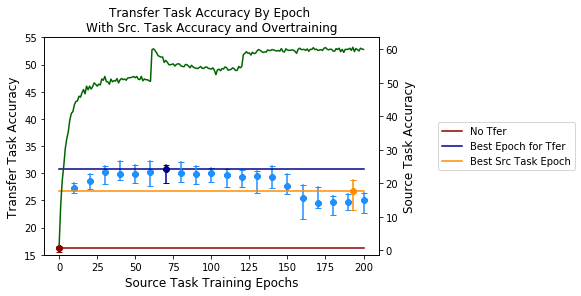

In [42]:
best_src=src_max
best_tfer = max_tfer

fig, ax1 = plt.subplots(1, 1, sharex=True)
ax2=ax1.twinx()
src_x = []
src_y = []
for k,v in src_net_stats.items():
    src_x.append(k)
    src_y.append(v['median'])
ax2.plot(src_x, src_y, color='darkgreen')
    
tfer_x = []
tfer_min = []
tfer_med = []
tfer_max = []
for k,v in stats_dict.items():
    tfer_x.append(k)
    tfer_min.append(v['min'])
    tfer_med.append(v['median'])
    tfer_max.append(v['max'])
    if k == 0:
        color = 'darkred'
        ax1.plot([0,200],[v['median'],v['median']],
              color = color, label= "No Tfer")
    elif k == best_src:
        color = 'darkorange'
        ax1.plot([0,200],[v['median'],v['median']],
              color = color, label= "Best Src Task Epoch")
    elif k == best_tfer:
        color = 'darkblue'
        ax1.plot([0,200],[v['median'],v['median']],
              color = color, label="Best Epoch for Tfer")

    else:
        color = 'dodgerblue'
        
    ax1.plot([k, k],[v['min'], v['max']],
              color = color)
    ax1.plot([k],[v['max']],marker='_',
              color = color)
    ax1.plot([k],[v['median']],marker='8',
              color = color)
    ax1.plot([k],[v['min']],marker='_',
              color = color)
    ax1.set_ylim([15,55])
    
    ax1.set_xlabel('Source Task Training Epochs', fontsize=12)
    ax1.set_ylabel('Transfer Task Accuracy', fontsize=12)
    ax1.legend(loc='center right', bbox_to_anchor=(1.6,0.5))
    ax2.set_ylabel('Source Task Accuracy', fontsize=12)
    plt.title('Transfer Task Accuracy By Epoch \nWith Src. Task Accuracy and Overtraining')
    plt.savefig("WideResnet_TinyImagenet_Prelim_Results.png")

In [43]:
os.getcwd()

'/home/smgutstein/Projects/SG_Projects/opt-tfer/notebooks'